In this notebook I will model and remove the global difference of ICRF3 S/X-, K-, and X/Ka-band CRFs wrt. the Gaia-CRF2.

The global difference is modeled as a 16-parameter transformation, whose parameters are estimated through a least square fitting based on a "all" sample of all common sources and a "clean" sample.

Four criteri are applied the "all" sample to the obtain this clean sample, which are listed as followed.

- angular separation $\rho$ less than 10 mas.

- normalized separation less than $X_0 = \sqrt{2\cdot\log{N}}$, where $N$ is number of common sources.

- formal uncertainties in either catalog less than 10 mas.

In [1]:
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column
from astropy import units as u
import numpy as np
import time
import sys

# My modules
from my_progs.vsh.vsh_fit import rotgliquad_fit_4_table
from func_tools import recalc_position_oft

First get positions of AGN at 4 bands from catalogs and calculate the position offset of SX-Gaia, K-Gaia, and XKa-Gaia.

In [2]:
# List of 488 common sources in four catalogs
com_sou = Table.read("../data/com-sou-list-DR2.txt", format="ascii")

# Gaia DR2 - S/X
sx_g = Table.read("../data/icrf3sx_gdr2.fits")

# K - Gaia DR2
k_g = Table.read("../data/icrf3k_gdr2.fits")

# X/Ka - Gaia DR2
xka_g = Table.read("../data/icrf3xka_gdr2.fits")

# Cross-match for the common source sample
sx_g_com = join(sx_g, com_sou, keys="iers_name")
k_g_com = join(k_g, com_sou, keys="iers_name")
xka_g_com = join(xka_g, com_sou, keys="iers_name")

In [3]:
kappa = 3

# 1. ICRF3 S/X vs. Gaia-CRF2

In [4]:
# S/X - Gaia (common)
# output_sx1 = rotgliquad_fit_4_table(sx_g_com, clip_limit=kappa)
output_sx1 = rotgliquad_fit_4_table(sx_g_com, std_clean=True)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       488
    Maximum degree of VSH                     2
    Number of unknowns to determine          16
    Number of degree of freedom             959

An upper limit will be put on the normalized separation X.
Since no value is given, the default value (sqrt(2*ln(#sou))) predicted from a standard Rayleigh distribution is used.
The LSQ fit is performed based a clean sample consisted ofall source with a normalized separation with X<=3.519.

==================== Standard-elimination ====================
    Nb_sources    Nb_outliers    Threshold
          386          102        3.519

Statistics information
-------------------------------------------------------------------
             Pre-fit             |             Post-fit            
-------------------------------------------------------------------
         dRA*         dDec       |         dRA*   

In [5]:
# S/X - Gaia (All)
# output_sx2 = rotgliquad_fit_4_table(sx_g, clip_limit=kappa)
output_sx2 = rotgliquad_fit_4_table(sx_g, std_clean=True)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                      2820
    Maximum degree of VSH                     2
    Number of unknowns to determine          16
    Number of degree of freedom            5623

An upper limit will be put on the normalized separation X.
Since no value is given, the default value (sqrt(2*ln(#sou))) predicted from a standard Rayleigh distribution is used.
The LSQ fit is performed based a clean sample consisted ofall source with a normalized separation with X<=3.986.

==================== Standard-elimination ====================
    Nb_sources    Nb_outliers    Threshold
         2368          452        3.986

Statistics information
-------------------------------------------------------------------
             Pre-fit             |             Post-fit            
-------------------------------------------------------------------
         dRA*         dDec       |         dRA*   

# 2. ICRF3 K vs. Gaia-CRF2

In [6]:
# K - Gaia(common)
# output_k1 = rotgliquad_fit_4_table(k_g_com, clip_limit=kappa)
output_k1 = rotgliquad_fit_4_table(k_g_com, std_clean=True)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       488
    Maximum degree of VSH                     2
    Number of unknowns to determine          16
    Number of degree of freedom             959

An upper limit will be put on the normalized separation X.
Since no value is given, the default value (sqrt(2*ln(#sou))) predicted from a standard Rayleigh distribution is used.
The LSQ fit is performed based a clean sample consisted ofall source with a normalized separation with X<=3.519.

==================== Standard-elimination ====================
    Nb_sources    Nb_outliers    Threshold
          419           69        3.519

Statistics information
-------------------------------------------------------------------
             Pre-fit             |             Post-fit            
-------------------------------------------------------------------
         dRA*         dDec       |         dRA*   

In [7]:
# K - Gaia (All)
# output_k2 = rotgliquad_fit_4_table(k_g, clip_limit=kappa)
output_k2 = rotgliquad_fit_4_table(k_g, std_clean=True)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       602
    Maximum degree of VSH                     2
    Number of unknowns to determine          16
    Number of degree of freedom            1187

An upper limit will be put on the normalized separation X.
Since no value is given, the default value (sqrt(2*ln(#sou))) predicted from a standard Rayleigh distribution is used.
The LSQ fit is performed based a clean sample consisted ofall source with a normalized separation with X<=3.578.

==================== Standard-elimination ====================
    Nb_sources    Nb_outliers    Threshold
          513           89        3.578

Statistics information
-------------------------------------------------------------------
             Pre-fit             |             Post-fit            
-------------------------------------------------------------------
         dRA*         dDec       |         dRA*   

# 3 ICRF3 X/Ka vs. Gaia-CRF2

In [8]:
# X/Ka -  Gaia (common)
# output_ka1 = rotgliquad_fit_4_table(xka_g_com, clip_limit=kappa)
output_ka1 = rotgliquad_fit_4_table(xka_g_com, std_clean=True)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       488
    Maximum degree of VSH                     2
    Number of unknowns to determine          16
    Number of degree of freedom             959

An upper limit will be put on the normalized separation X.
Since no value is given, the default value (sqrt(2*ln(#sou))) predicted from a standard Rayleigh distribution is used.
The LSQ fit is performed based a clean sample consisted ofall source with a normalized separation with X<=3.519.

==================== Standard-elimination ====================
    Nb_sources    Nb_outliers    Threshold
          349          139        3.519

Statistics information
-------------------------------------------------------------------
             Pre-fit             |             Post-fit            
-------------------------------------------------------------------
         dRA*         dDec       |         dRA*   

In [9]:
# X/Ka - gaia (All)
# output_ka2 = rotgliquad_fit_4_table(xka_g, clip_limit=kappa)
output_ka2 = rotgliquad_fit_4_table(xka_g, std_clean=True)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       505
    Maximum degree of VSH                     2
    Number of unknowns to determine          16
    Number of degree of freedom             993

An upper limit will be put on the normalized separation X.
Since no value is given, the default value (sqrt(2*ln(#sou))) predicted from a standard Rayleigh distribution is used.
The LSQ fit is performed based a clean sample consisted ofall source with a normalized separation with X<=3.528.

==================== Standard-elimination ====================
    Nb_sources    Nb_outliers    Threshold
          366          139        3.528

Statistics information
-------------------------------------------------------------------
             Pre-fit             |             Post-fit            
-------------------------------------------------------------------
         dRA*         dDec       |         dRA*   

# 4 Combine all results

In [10]:
cat_names = ["S/X$-$Gaia", "K$-$Gaia", "X/Ka$-$Gaia"]

names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$",
        "$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
        "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

num = len(names)
width = 0.2
loc = np.arange(num) * 2

In [11]:
estimates = [[output_sx1["pmt2"]*1e3, output_sx2["pmt2"]*1e3],
             [output_k1["pmt2"]*1e3, output_k2["pmt2"]*1e3],
             [output_ka1["pmt2"]*1e3, output_ka2["pmt2"]*1e3]
             ]

heights = [[2*output_sx1["sig2"]*1e3, 2*output_sx2["sig2"]*1e3],
           [2*output_k1["sig2"]*1e3, 2*output_k2["sig2"]*1e3],
           [2*output_ka1["sig2"]*1e3, 2*output_ka2["sig2"]*1e3]]

bottoms = [[(output_sx1["pmt2"]-output_sx1["sig2"])*1e3,
            (output_sx2["pmt2"]-output_sx2["sig2"])*1e3],
           [(output_k1["pmt2"]-output_k1["sig2"])*1e3,
            (output_k2["pmt2"]-output_k2["sig2"])*1e3],
           [(output_ka1["pmt2"]-output_ka1["sig2"])*1e3,
            (output_ka2["pmt2"]-output_ka2["sig2"])*1e3]]

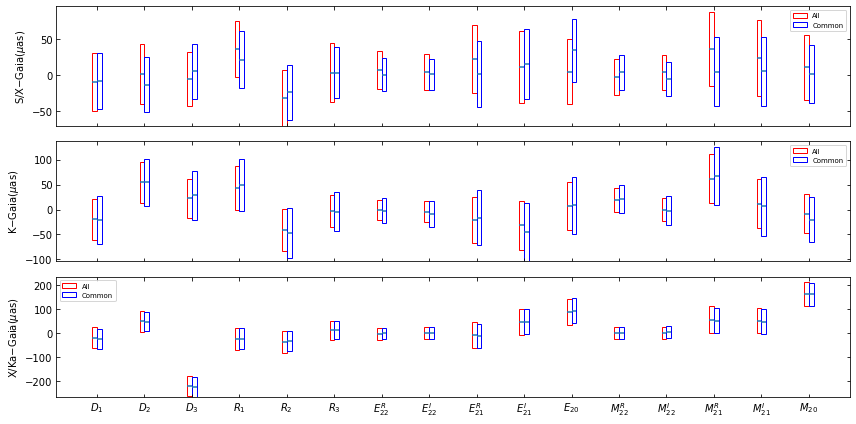

In [12]:
fig, ax = plt.subplots(figsize=(12, 6), nrows=3, sharex=True)

for i, cat_name in enumerate(cat_names):
    ax[i].bar(loc-width, heights[i][0], fill=False,
              bottom=bottoms[i][0], edgecolor="r",
              width=width, align="edge", label="All")
    
    ax[i].bar(loc, heights[i][1], fill=False,
              bottom=bottoms[i][1], edgecolor="b",
              width=width, align="edge", label="Common")
    
    ax[i].hlines(estimates[i][0], loc-width, loc)
    ax[i].hlines(estimates[i][1], loc, loc+width)
    
    ax[i].legend(fontsize="x-small")

    ax[i].set_ylabel("{}($\mu$as)".format(cat_name))

ax[2].set_xticks(loc)
ax[2].set_xticklabels(names)
plt.tight_layout()

In [13]:
# S/X - Gaia (common sources in four bands)
sx_g_com.keep_columns(["source_id", "ra", "dec", "ra_err_gdr2", "dec_err_gdr2",
                       "parallax", "parallax_err", "pmra", "pmra_err", "pmdec", "pmdec_err",
                       "ra_dec_corr_gdr2",
                       "icrf_name", "iers_name",
                       "pos_err_max_gdr2", "pos_err_min_gdr2", "eepa_gdr2",
                       "type", "ra_icrf3sx", "dec_icrf3sx",
                       "ra_err_icrf3sx", "dec_err_icrf3sx", "ra_dec_corr_icrf3sx",
                       "mean_obs", "pos_err_max_icrf3sx", "pos_err_min_icrf3sx",
                       "eepa_icrf3sx", "beg_obs", "end_obs", "nb_sess", "nb_del",
                       "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov",
                       "ang_sep", "ang_sep_err", "pa", "pa_err",
                       "nor_ra", "nor_dec", "nor_sep"])


recalc_position_oft(sx_g, output_sx2["residual"], "cor")
sx_g.write("../data/icrf3sx_gdr2_all_combined.fits", overwrite=True)

In [14]:
# S/X - Gaia (common sources in four bands)
sx_g_com.keep_columns(["source_id", "ra", "dec", "ra_err_gdr2", "dec_err_gdr2",
                       "parallax", "parallax_err",
                       "pmra", "pmra_err", "pmdec", "pmdec_err",
                       "ra_dec_corr_gdr2",
                       "icrf_name", "iers_name",
                       "pos_err_max_gdr2", "pos_err_min_gdr2", "eepa_gdr2",
                       "type", "ra_icrf3sx", "dec_icrf3sx",
                       "ra_err_icrf3sx", "dec_err_icrf3sx", "ra_dec_corr_icrf3sx",
                       "mean_obs", "pos_err_max_icrf3sx", "pos_err_min_icrf3sx",
                       "eepa_icrf3sx", "beg_obs", "end_obs", "nb_sess", "nb_del",
                       "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov",
                       "ang_sep", "ang_sep_err", "pa", "pa_err",
                       "nor_ra", "nor_dec", "nor_sep"])


recalc_position_oft(sx_g_com, output_sx1["residual"], "cor")
sx_g_com.write("../data/icrf3sx_gdr2_com_combined.fits", overwrite=True)

In [15]:
# K - Gaia (common sources)
k_g.keep_columns([
    "source_id", "ra", "dec", "ra_err_gdr2", "dec_err_gdr2", "parallax",
    "parallax_err", "pmra", "pmra_err", "pmdec",
    "pmdec_err", "ra_dec_corr_gdr2", "icrf_name", "iers_name",
    "pos_err_max_gdr2", "pos_err_min_gdr2", "eepa_gdr2", "type",
    "ra_icrf3k", "dec_icrf3k", "ra_err_icrf3k", "dec_err_icrf3k",
    "ra_dec_corr_icrf3k", "mean_obs", "pos_err_max_icrf3k",
    "pos_err_min_icrf3k", "eepa_icrf3k", "beg_obs", "end_obs", "nb_sess",
    "nb_del", "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep"
])

recalc_position_oft(k_g, output_k2["residual"], "cor")
k_g.write("../data/icrf3k_gdr2_all_combined.fits", overwrite=True)

In [16]:
# K - Gaia (common sources in four bands)
k_g_com.keep_columns([
    "source_id", "ra", "dec", "ra_err_gdr2", "dec_err_gdr2", "parallax",
    "parallax_err", "pmra", "pmra_err", "pmdec",
    "pmdec_err", "ra_dec_corr_gdr2", "icrf_name", "iers_name",
    "pos_err_max_gdr2", "pos_err_min_gdr2", "eepa_gdr2", "type",
    "ra_icrf3k", "dec_icrf3k", "ra_err_icrf3k", "dec_err_icrf3k",
    "ra_dec_corr_icrf3k", "mean_obs", "pos_err_max_icrf3k",
    "pos_err_min_icrf3k", "eepa_icrf3k", "beg_obs", "end_obs", "nb_sess",
    "nb_del", "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep"
])

recalc_position_oft(k_g_com, output_k1["residual"], "cor")
k_g_com.write("../data/icrf3k_gdr2_com_combined.fits", overwrite=True)

In [17]:
# X/Ka - Gaia (common sources)
xka_g.keep_columns([
    "source_id", "ra", "dec", "ra_err_gdr2", "dec_err_gdr2", "parallax",
    "parallax_err", "pmra", "pmra_err", "pmdec",
    "pmdec_err", "ra_dec_corr_gdr2", "icrf_name", "iers_name",
    "pos_err_max_gdr2", "pos_err_min_gdr2", "eepa_gdr2", "type",
    "ra_icrf3xka", "dec_icrf3xka", "ra_err_icrf3xka", "dec_err_icrf3xka",
    "ra_dec_corr_icrf3xka", "mean_obs", "pos_err_max_icrf3xka",
    "pos_err_min_icrf3xka", "eepa_icrf3xka", "beg_obs", "end_obs", "nb_sess",
    "nb_del", "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep"
])

recalc_position_oft(xka_g, output_ka2["residual"], "cor")
xka_g.write("../data/icrf3xka_gdr2_all_combined.fits", overwrite=True)

In [18]:
# X/Ka - Gaia (common sources in four bands)
xka_g_com.keep_columns([
    "source_id", "ra", "dec", "ra_err_gdr2", "dec_err_gdr2", "parallax",
    "parallax_err", "pmra", "pmra_err", "pmdec",
    "pmdec_err", "ra_dec_corr_gdr2", "icrf_name", "iers_name",
    "pos_err_max_gdr2", "pos_err_min_gdr2", "eepa_gdr2", "type",
    "ra_icrf3xka", "dec_icrf3xka", "ra_err_icrf3xka", "dec_err_icrf3xka",
    "ra_dec_corr_icrf3xka", "mean_obs", "pos_err_max_icrf3xka",
    "pos_err_min_icrf3xka", "eepa_icrf3xka", "beg_obs", "end_obs", "nb_sess",
    "nb_del", "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep"
])

recalc_position_oft(xka_g_com, output_ka1["residual"], "cor")
xka_g_com.write("../data/icrf3xka_gdr2_com_combined.fits", overwrite=True)

In [19]:
sx_g_com = sx_g_com["icrf_name", "iers_name", "source_id", "ra", "dec", "dra",
                    "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
                    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec",
                    "nor_sep", "dra_cor", "ddec_cor", "ang_sep_cor", "pa_cor",
                    "nor_ra_cor", "nor_dec_cor", "nor_sep_cor", "ra_err_gdr2",
                    "dec_err_gdr2", "ra_dec_corr_gdr2", "pos_err_max_gdr2",
                    "pos_err_min_gdr2", "eepa_gdr2", "ra_err_icrf3sx",
                    "dec_err_icrf3sx", "ra_dec_corr_icrf3sx",
                    "pos_err_max_icrf3sx", "pos_err_min_icrf3sx",
                    "eepa_icrf3sx", "parallax", "parallax_err", "pmra",
                    "pmra_err", "pmdec", "pmdec_err"]

sx_g_com.rename_columns([
    "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep", "dra_cor",
    "ddec_cor", "ang_sep_cor", "pa_cor", "nor_ra_cor", "nor_dec_cor",
    "nor_sep_cor"
], [
    "dra_sx", "ddec_sx", "dra_err_sx", "ddec_err_sx", "dra_ddec_cov_sx",
    "ang_sep_sx", "ang_sep_err_sx", "pa_sx", "pa_err_sx", "nor_ra_sx",
    "nor_dec_sx", "nor_sep_sx", "dra_sx_cor", "ddec_sx_cor", "ang_sep_sx_cor",
    "pa_sx_cor", "nor_ra_sx_cor", "nor_dec_sx_cor", "nor_sep_sx_cor"
])

In [20]:
k_g_com = k_g_com["iers_name", "dra", "ddec", "dra_err", "ddec_err",
                  "dra_ddec_cov", "ang_sep", "ang_sep_err", "pa", "pa_err",
                  "nor_ra", "nor_dec", "nor_sep", "dra_cor", "ddec_cor",
                  "ang_sep_cor", "pa_cor", "nor_ra_cor", "nor_dec_cor",
                  "nor_sep_cor", "ra_err_icrf3k", "dec_err_icrf3k",
                  "ra_dec_corr_icrf3k", "pos_err_max_icrf3k",
                  "pos_err_min_icrf3k", "eepa_icrf3k"]

k_g_com.rename_columns([
    "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep", "dra_cor",
    "ddec_cor", "ang_sep_cor", "pa_cor", "nor_ra_cor", "nor_dec_cor",
    "nor_sep_cor"
], [
    "dra_k", "ddec_k", "dra_err_k", "ddec_err_k", "dra_ddec_cov_k",
    "ang_sep_k", "ang_sep_err_k", "pa_k", "pa_err_k", "nor_ra_k", "nor_dec_k",
    "nor_sep_k", "dra_k_cor", "ddec_k_cor", "ang_sep_k_cor", "pa_k_cor",
    "nor_ra_k_cor", "nor_dec_k_cor", "nor_sep_k_cor"
])

In [21]:
xka_g_com = xka_g_com["iers_name", "dra", "ddec", "dra_err", "ddec_err",
                      "dra_ddec_cov", "ang_sep", "ang_sep_err", "pa", "pa_err",
                      "nor_ra", "nor_dec", "nor_sep", "dra_cor", "ddec_cor",
                      "ang_sep_cor", "pa_cor", "nor_ra_cor", "nor_dec_cor",
                      "nor_sep_cor", "ra_err_icrf3xka", "dec_err_icrf3xka",
                      "ra_dec_corr_icrf3xka", "pos_err_max_icrf3xka",
                      "pos_err_min_icrf3xka", "eepa_icrf3xka"]

xka_g_com.rename_columns([
    "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
    "ang_sep_err", "pa", "pa_err", "nor_ra", "nor_dec", "nor_sep", "dra_cor",
    "ddec_cor", "ang_sep_cor", "pa_cor", "nor_ra_cor", "nor_dec_cor",
    "nor_sep_cor"
], [
    "dra_ka", "ddec_ka", "dra_err_ka", "ddec_err_ka", "dra_ddec_cov_ka",
    "ang_sep_ka", "ang_sep_err_ka", "pa_ka", "pa_err_ka", "nor_ra_ka",
    "nor_dec_ka", "nor_sep_ka", "dra_ka_cor", "ddec_ka_cor", "ang_sep_ka_cor",
    "pa_ka_cor", "nor_ra_ka_cor", "nor_dec_ka_cor", "nor_sep_ka_cor"
])

In [22]:
temp1 = join(sx_g_com, k_g_com, keys="iers_name")

multi_freq_oft = join(temp1, xka_g_com, keys="iers_name")

multi_freq_oft.meta["comments"] = [
    "Position offset for {} common sources between ICRF3 S/X ICRF3 K, and ICRF3 X/Ka "
    "wrt. Gaia-CRF2".format(len(multi_freq_oft)),
    "Created at {}".format(time.asctime())]

multi_freq_oft.write("../data/multiwav-offset-in-Gaia-frame2.fits", overwrite=True)